In [ ]:
#coding=utf-8
import os
import cv2
import torch
import numpy as np

from matplotlib import pyplot as plt


class Kmeans(object):
    def __init__(self, k, distance_func=lambda x, y: ((x - y) ** 2).sum(dim=-1)):
        self.k = k
        self.centers = None
        self.distance_func = distance_func
        
    def init_center(self, x):
        index = np.random.randint(x.shape[0], size=(self.k, ))
        self.centers = x[index]
        
    def update_one_step(self, x):
        assignment = self.predict(x)
        for c in range(self.k):
            index = (assignment == c)
            if index.sum() != 0:
                new_c = x[index].mean(dim=0)
                self.centers[c] = new_c
            else:
                new_c = x[np.random.randint(x.shape[0], size=(1, ))]
                self.centers[c] = new_c
                
    def fit(self, x, step=100):
        if self.centers is None:
            self.init_center(x)
        for i in range(step):
            self.update_one_step(x)
            
    def predict(self, x):
        centers_nkc = torch.unsqueeze(self.centers,dim=0)
        x_nkc = torch.unsqueeze(x, dim=1)
        distances = self.distance_func(x_nkc, centers_nkc)
        assignment = distances.argmin(dim=1)
        return assignment
    
    def get_centers(self):
        return self.centers.cpu().numpy()
    
    def get_mean_distance(self):
        return (1 - distance_func(x_cuda, kmeans.centers)).mean().cpu().numpy()
    
    
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join(map(str, (2, 3)))
x = np.random.rand(100000, 2)

x_cuda = torch.as_tensor(x).cuda()
distance_func = lambda x, y: (1 - torch.min(x.unsqueeze(dim=1), y.unsqueeze(dim=0)).prod(dim=-1) / 
                              torch.max(x.unsqueeze(dim=1), y.unsqueeze(dim=0)).prod(dim=-1)).min(dim=1)[0]
kmeans = Kmeans(5, distance_func)

kmeans.fit(x_cuda, 1000)
y = kmeans.predict(x_cuda).detach().cpu().numpy()
centers = kmeans.get_centers()
print(kmeans.get_mean_distance())
plt.scatter(x[:, 0], x[:, 1], c=y * 0.1)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=80)

mious = []
for i in range(1, 10):
    kmeans = Kmeans(i, distance_func)
    kmeans.fit(x_cuda, 100)
    miou = kmeans.get_mean_distance()
    print('anchor: {}, miou: {}'.format(i, miou))
    mious.append(miou)
    
plt.plot(mious)

In [1]:
#coding=utf-8
import os
import torch
import torchvision as tv
from matplotlib import pyplot as plt
from tensorboardX import SummaryWriter

from config import *
from detector import Detector
from utils import visualization
from dataset import detection, augmentations
from net import center_net, xception, resnet_atrous


if __name__ == '__main__':
    checkpoint_name = 'Detection ratio: {} num_classes: {} with_FPN: {} radius: {}'.format(
        ratio, num_classes, feature_channels is not None, radius)
    comment = 'Detection ratio: {} num_classes: {} with_FPN: {} radius: {}'.format(
        ratio, num_classes, feature_channels is not None, radius)
    os.environ["CUDA_VISIBLE_DEVICES"] = ','.join(map(str, devices))
    
    train_transforms = tv.transforms.Compose([
        augmentations.Resize(img_size), 
        augmentations.BoxToHeatmap(num_classes, output_stride, radius), 
#         augmentations.ToTensor(), 
    ])
    train_set = detection.DetectionDataset(dataset_dir, dataset_dir, train_transforms)

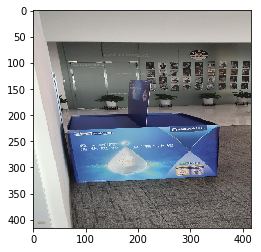

In [2]:
plt.imshow(train_set[0][0])

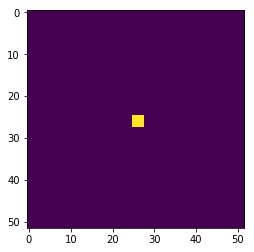

In [3]:
plt.imshow(train_set[0][1][:, :, 0])

In [ ]:
backbone = resnet_atrous.resnet50_atrous(pretrained=True, output_stride=output_stride)
model = center_net.CenterNet(backbone, num_classes, feature_channels)
solver = Detector(model)
solver.load_model(checkpoint_path)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
images = np.array([cv2.resize(plt.imread('data/VOCdevkit/VOC2012/JPEGImages/2007_003682.jpg'), (416, 416))])

In [ ]:
out = solver.predict(images)

In [ ]:
plt.imshow(out[0, 0])

In [ ]:
plt.imshow(images[0])

In [ ]:
labels = np.array([cv2.resize(plt.imread('data/VOCdevkit/VOC2012/SegmentationClass/2007_003682.png'), (416, 416))])

In [ ]:
plt.imshow(labels[0])